# OpenCV Edge Detection
In general contours are the boundary pixels of an object/image that has same color and intensity. They are useful in shape analysis and object detection/recognition using traditional computer vision algorithms. You can do a lot of analysis based on contours to arrive at a solution to many computer vision problems.

In this Notebook, you will learn the approach and many different aspects of contour analysis.

## <font style="color:rgb(50,120,229)">Objective </font>
 - Learn how to find contour.
 - Learn drawing contour.
 - Learn various properties, such as **centre of mass, area of parameter, fitting bounding box and ellipse**

## 1. Import Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/vmzfc3wy5wwfrvi/AACY8uK6k6aTF5QJahLkAplta?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

module-code.zip     100%[===================>]  93.20M  31.0MB/s    in 3.0s    
mapname:  conversion of  failed


In [2]:
print(cv2.__version__)

4.11.0


In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## 2. Load an image and display

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/287dmicr7k30m3q/AADpOe7w4ouuMp2cyA1uNFjva?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

module-code.zip     100%[===================>]  30.59M  36.3MB/s    in 0.8s    
mapname:  conversion of  failed


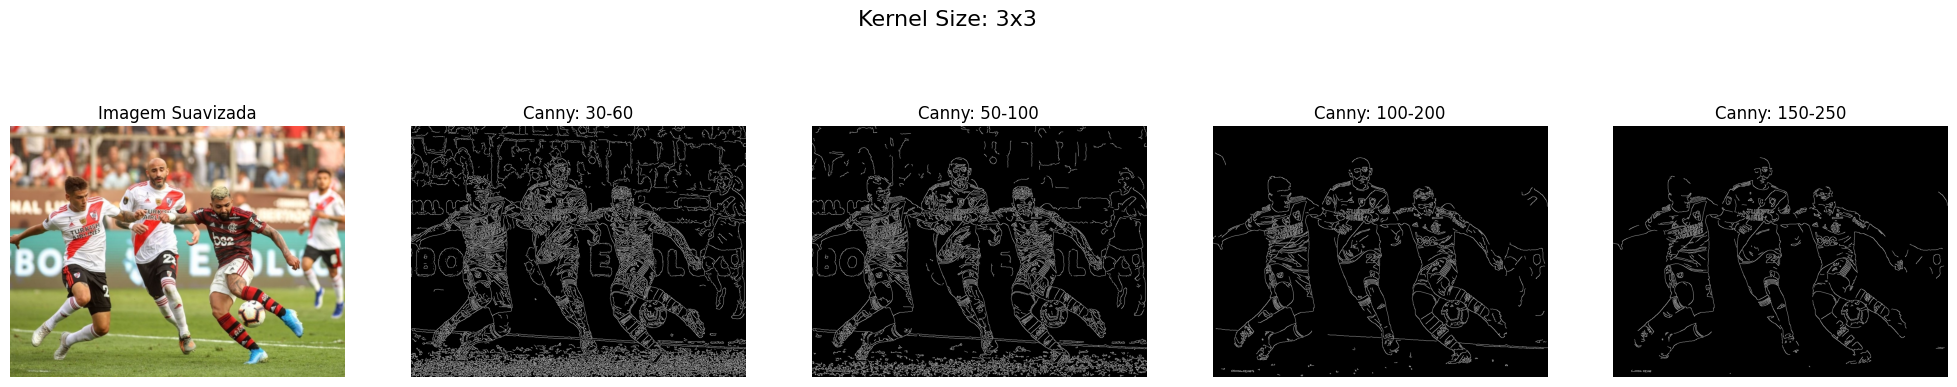

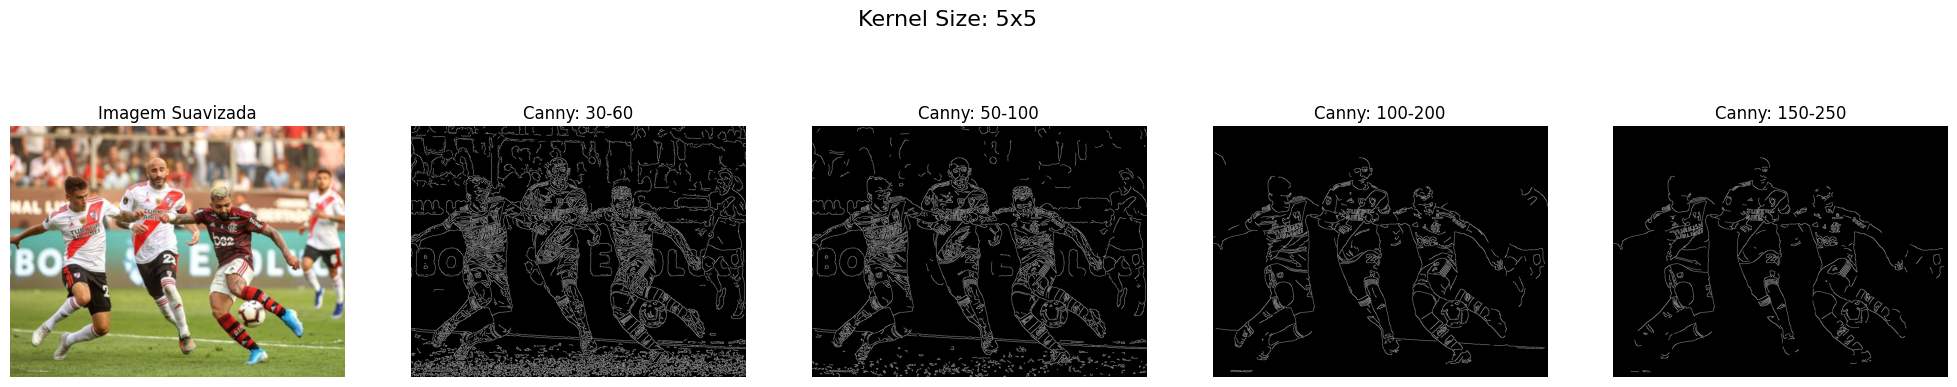

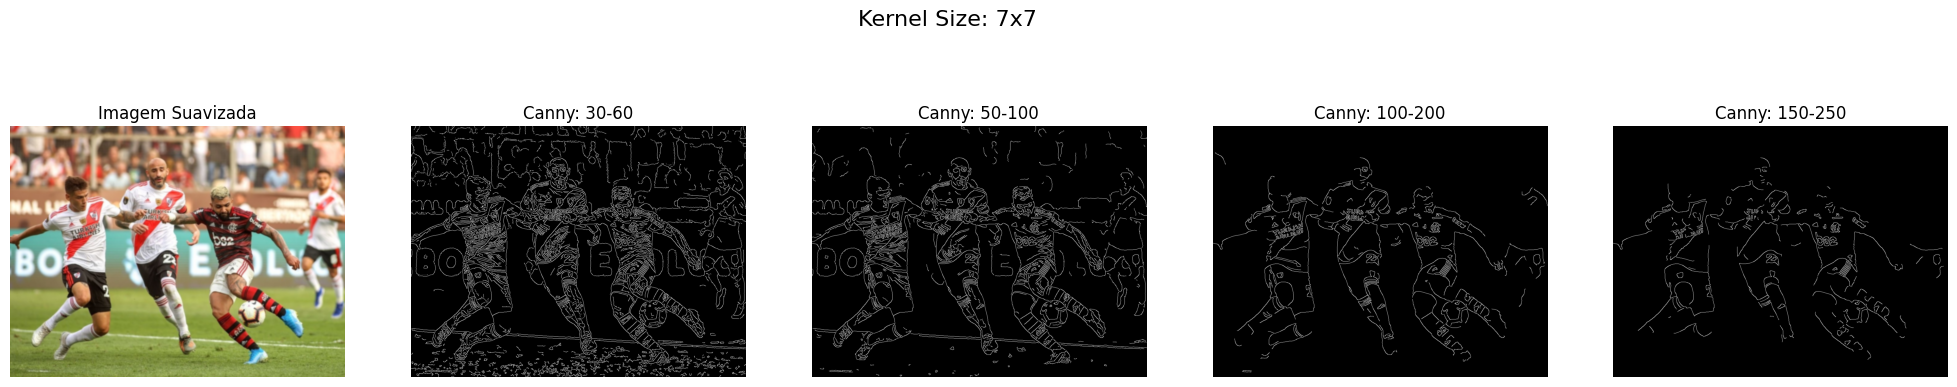

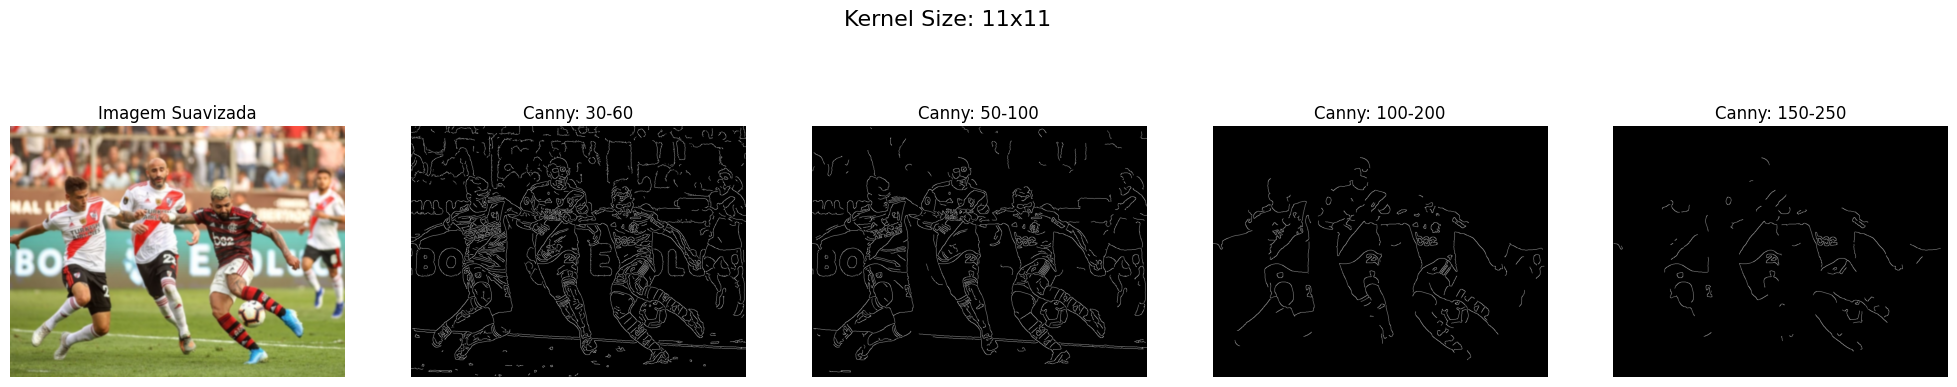

In [12]:
filename = 'image.jpg'
image = cv2.imread(filename)


kernels = [3, 5, 7, 11]


thresholds = [(30, 60), (50, 100), (100, 200), (150, 250)]


for kernel_size in kernels:
    blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

    grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3)
    abs_grad = cv2.addWeighted(cv2.convertScaleAbs(grad_x), 0.5, cv2.convertScaleAbs(grad_y), 0.5, 0)


    fig, axs = plt.subplots(1, len(thresholds) + 1, figsize=(25, 5))
    fig.suptitle(f'Kernel Size: {kernel_size}x{kernel_size}', fontsize=16)

    axs[0].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Imagem Suavizada')
    axs[0].axis('off')

    for i, (low, high) in enumerate(thresholds, 1):
        edges = cv2.Canny(gray, low, high)

        axs[i].imshow(edges)
        axs[i].set_title(f'Canny: {low}-{high}')
        axs[i].axis('off')

    plt.show()

Por que suavizar ajuda na detecção de bordas?

O processo de suavização remove ruídos que interferem na detecção de bordas, utilizando filtros como o Gaussiano, que preserva bordas via média ponderada. Kernels médios (5x5 a 7x7) equilibram redução de ruído e preservação de detalhes. Por fim, limiares do Canny devem ser ajustados: valores baixos detectam ruídos; altos ignoram bordas legítimas.